# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

The main problem of this assignment is to implement gradient descent and the normal equation to fit regression problems and attempt to estimate the cost of medical charges given some data with numerical and categorial features. After implementaiton, the learning rate will have to be found through tuning the parameters of the implemented models in an attempt to get closer to the true value of the medical charges that we are predicting. Finally, the implemented models along with stochastic gradient descent will be compared amongst each other.

In [ ]:
# Import some common packages
import sklearn
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
def loadmedicalcostdata():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('insurance.csv')
  return housing

medcost = loadmedicalcostdata()
medcost.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
medcost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




*   How big is your dataset? (in terms of MB)
  73.3 KB
* How many entries does it have?
  1338 entries
* How many features does it have?
  7 features
* Does it contain any categorical data?
  Yes
* Is there any missing value?
  No
* What are some basic statistics you can learn right away about this dataset?
  Basic statistics can be seen below.



In [ ]:
medcost.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


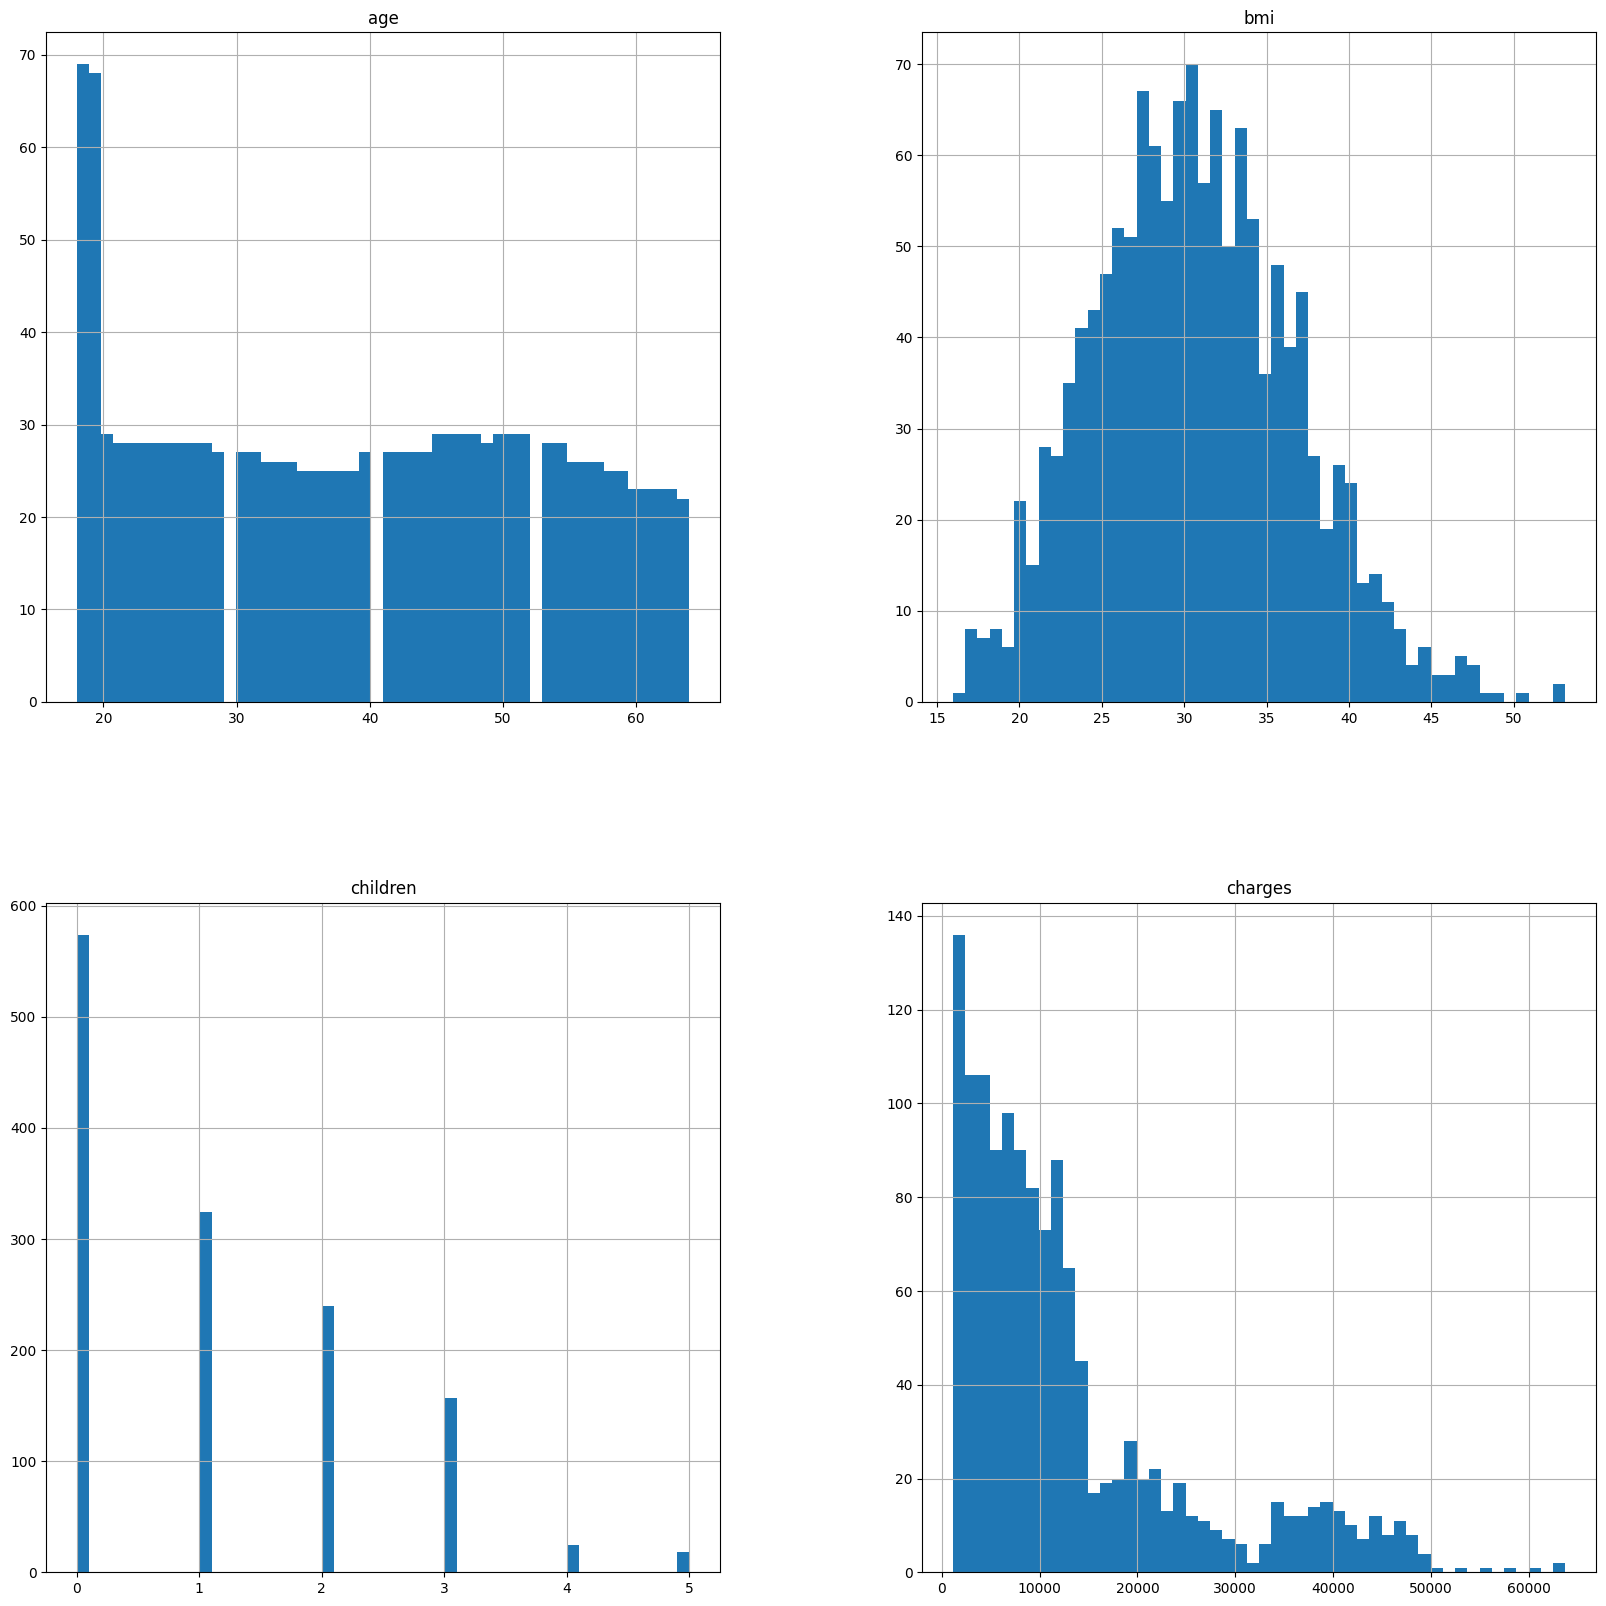

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
medcost.hist(bins = 50, figsize=(20,20))
plt.show()
#save_fig("attribute_histogram_plots")

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class.

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
X_train = [];
y_train = [];
X_test = [];
y_test = [];

In [ ]:
corr_matrix = medcost.corr()
corr_matrix.shape

<ipython-input-328-e2da7e238cd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = medcost.corr()


(4, 4)

In [ ]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

array([[<Axes: xlabel='charges', ylabel='charges'>,
        <Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>],
       [<Axes: xlabel='charges', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>],
       [<Axes: xlabel='charges', ylabel='bmi'>,
        <Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>],
       [<Axes: xlabel='charges', ylabel='children'>,
        <Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>]], dtype=object)

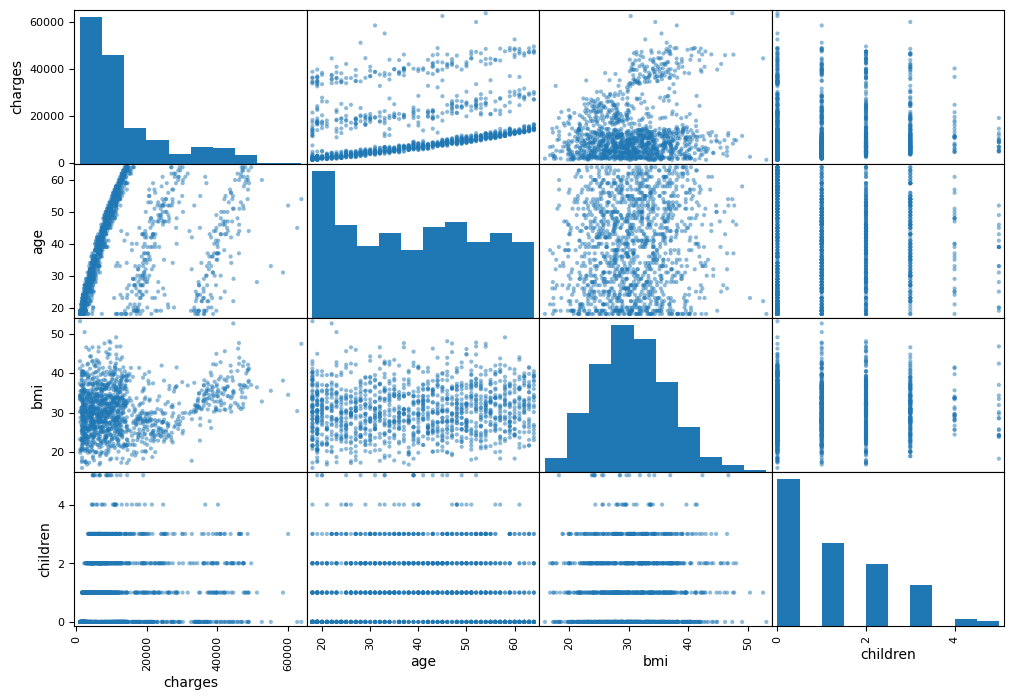

In [ ]:
attributes = ["charges", "age", "bmi", "children"]

scatter_matrix(medcost[attributes], figsize=(12,8))
# save_fig("scatter_matrix_plot")

In [ ]:
medcost_charges = medcost["charges"].copy()
medcost = medcost.drop("charges", axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(medcost, medcost_charges, test_size=0.2, random_state=42)

In [ ]:
medcost.shape

(1338, 6)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [ ]:
null_check = medcost[medcost.isnull().any(axis=1)].head()
null_check

,age,sex,bmi,children,smoker,region


In [ ]:
medcost = X_train.copy()
medcost_charges = y_train.copy()

In [ ]:
medcost_num = medcost.select_dtypes(include=[np.number])
medcost_cat = medcost.select_dtypes(include = [object])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class numdataoperations(BaseEstimator, TransformerMixin):
    def __init__ (self):
        self = self
    def operations(self,X,y = None):
        X = X-X.mean()
        X = X/X.std()
        return X
    def fit(self, X, y = None):
        return self
    def transform(self,X,y = None):
        return X.apply(self.operations)

In [ ]:
num_pipeline = Pipeline([
        ('operations', numdataoperations()),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(medcost_num)
cat_attribs = list(medcost_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(medcost)

In [ ]:
X_test_tr = X_test.copy()
X_test = full_pipeline.fit_transform(X_test_tr)

In [ ]:
y_train = np.array(y_train)

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods.

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [ ]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation
class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = []; # parameter vector;
    self.alpha = 0.39; # learning rate
    self.cost  = []; # cost function

  def fitUsingGradientDescent(self, X_train, y_train, iters = 500):
    """
    Train the regressor using gradient descent
    """
    # implementation code here
    X_b = np.c_[np.ones((len(X_train),1)), X_train]
    y_train = y_train[:,np.newaxis]
    self.theta = np.random.randn(len(X_b[0]),1)
    self.theta, self.cost = self.gradientDescent(X_b, y_train, self.theta, self.alpha, iters)
    return self.cost

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    #implementation code here for Task 4.
    m = X_train.shape[0]
    X_b = np.c_[np.ones((len(X_train),1)), X_train]
    y_train = y_train[:,np.newaxis]
    self.theta = np.linalg.pinv(X_b).dot(y_train)
    self.cost = (1/m*(X_b.dot(self.theta)-y_train)**2).sum()
    return self.cost

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT:
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here
    m = X_train.shape[0]
    for iteration in range(iters):
        gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
        theta = theta - alpha * gradients

    self.theta = theta
    # self.cost = 1/m * (X_train.dot(self.theta) - y_train).T.dot(X_train.dot(self.theta) - y_train)
    self.cost = (1/m*(X_train.dot(self.theta)-y_train)**2).sum()
    return self.theta, self.cost


  def predict(self, X_test):
    """
    Predicting the label
    """
    # implementation code here
    #return y_predict
    X_test = np.c_[np.ones((len(X_test),1)),X_test]
    y_predict = X_test.dot(self.theta)
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }
    return("Parameter vector is %f" % self.theta)

# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()

#myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

Text(0.5, 1.0, 'Error vs. Training Iterations')

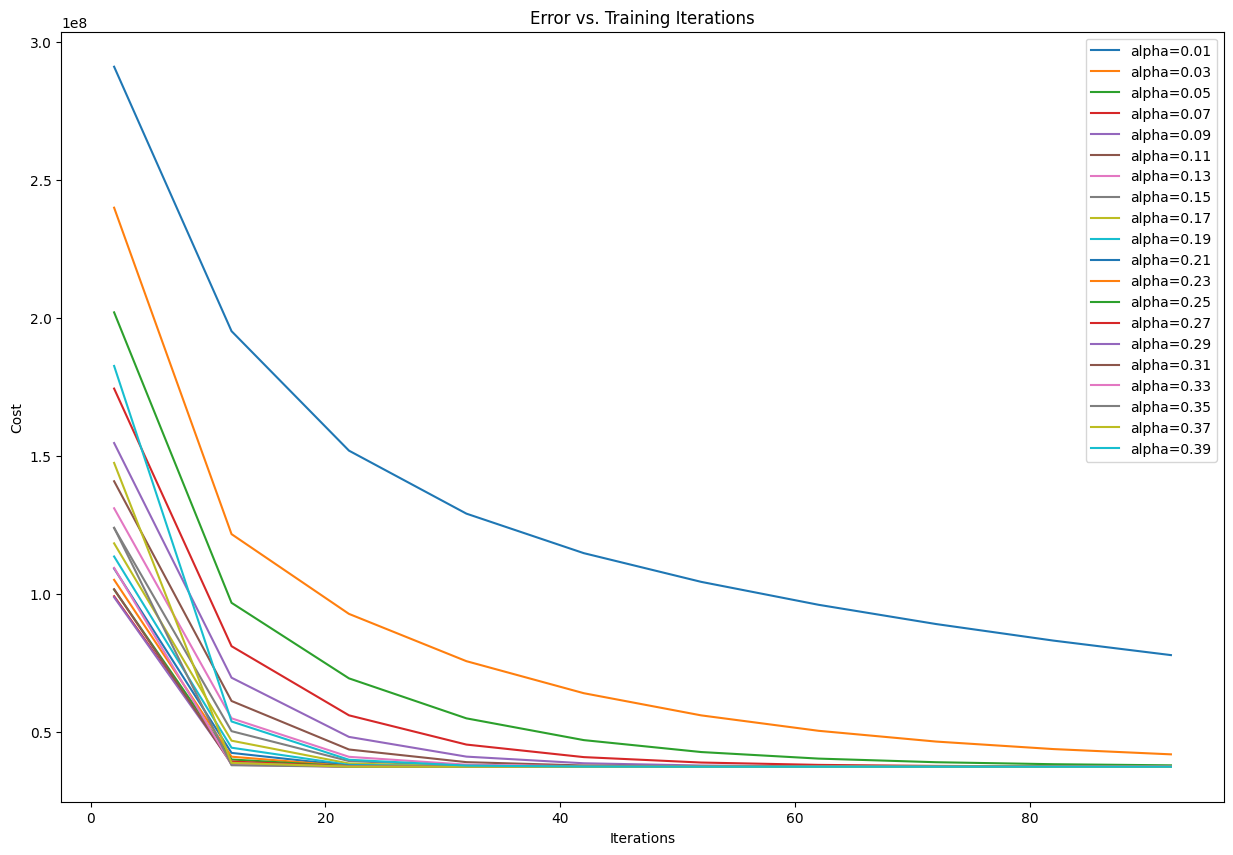

In [ ]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.

plt.figure(figsize=(15, 10))
iters = list(range(2,100,10))
legend=[]

for i in range (1,40,2):
  myGradientDescentModel.alpha = i/100
  costs = []
  for j in iters:
    costs.append(myGradientDescentModel.fitUsingGradientDescent(X_train, y_train,j))
  plt.plot(iters,costs)
  legend.append("alpha="+str(i/100))

plt.legend(legend)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Iterations')

Looking at the plot, it can be seen that as the alpha value increases, so does the amount the cost function decreaseses, but this behavior definitely does not continue infinitely; there is a max value for alpha before this trend begins to not stay consistent. As it can be seen from the legend and the graph itself, the best alpha value for this example was 0.39.

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [ ]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

37278061.248026714

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [ ]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("SGD rmse:",mySGDModel_rmse)

# myGradientDescentModel_rmse
myGradientDescentModel.fitUsingGradientDescent(X_train,y_train)
y_predict_gd = myGradientDescentModel.predict(X_test)
gdmse = mean_squared_error(y_test,y_predict_gd)
gdrmse = np.sqrt(gdmse)
print("GD rmse:",gdrmse)

# myNormalEquationModel_rmse
myGradientDescentModel.fitUsingNormalEquation(X_train,y_train)
y_predict_ne = myGradientDescentModel.predict(X_test)
nemse = mean_squared_error(y_test,y_predict_ne)
nermse = np.sqrt(nemse)
print("Norm Eq rmse:",nermse)


SGD rmse: 5807.691490390061
GD rmse: 5795.332533018758
Norm Eq rmse: 5794.066362529114


The gradient descent model and the normal equation model are very close to each other with the latter having an edge over the former. The normal equation model yields the best performance measure for the data set as it has the lowest rmse of the three models with a rmse of 5794.07. The stochastic gradient descent model had the highest rmse. Overall since the error is smaller than the standard deviation of the medical charges from the original data, I would say that the error was pretty good (5794.07 < 12110.01).

- - -
## Task 6. PRESENT YOUR SOLUTION

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

The goal of this problem was accomlished as a gradient descent model and normal equation model were able to be implemented. After fitting the test data onto these models along with stochastic gradient descent, it could be seen that the gradient descent model (5795.33) and the normal equation model (5794.07) yielded the lowest rmse where the normal equation model's rmse was even slightly lower.

The models performed quite well as the errors were less than the standard deviation of the medical charges from the original data. If the true mean were to be estimated with the models, the error would be well within 1 standard deviation from the true value.

What I learned from this problem is how important it is to tune the hyperparameters of the model and how important it is to clean the data. By changing the hyperparameters of the implemented models, the rmse of the predicted and actual values can increase or decrease, so you must modify the hyperparameters accordingly. I also learned that although it may seem that by infinitely increasing the value of theta will decrease the rmse, there a certain limit at which it will have adverse effects. Overshooting and undershooting the learning rate can heart the models' abilities to perform; these issues however were handled by using graphs to compare various alpha values.

Some insight moving forward to improve the solution to this problem would be finding out different ways to split the traning data in order to effectively improve the model. I would also like to possibly remove or add more featueres and also split the data in multiple ways.

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!